## Tasks
Submit your answers directly in the workspace provided.
1. For every column in the data:
	- State whether the values match the description given in the table above.
    - State the number of missing values in the column
    - Describe what you did to make values match the description if they did not match.
2. Create a visualization that shows how many reviews were from owners and how many were not owners. Use the visualization to:
    - State which category of the variable owned has the most number of observations
	- Explain whether the observations are balanced across categories of the variable owned
3. Describe the distribution of the overall rating across the possible values. Your answer must include a visualization that shows the distribution.
4. Describe the relationship between ownership and overall rating. Your answer must include a visualization to demonstrate the relationship.
5. The business wants to predict whether a review came from an owner or not using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).
6. Fit a baseline model to predict whether a review came from an owner or not using the data provided. You must include your code.
7. Fit a comparison model to predict whether a review came from an owner or not using the data provided. You must include your code.
8. Explain why you chose the two models used in parts 6 and 7.
9. Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.
10. Explain which model performs better and why.

## Column value:

![datacamp](datacamp.png)


# Data Validation

The data contains 1500 rows and 8 columns with missing values. After examining the data, I draw the following conclusions:

- owned: convert into category data type
- make_model: convert into category data type
- review_month: remove unnecessary values to have a short format of months, convert into category data type
- web_browser: 150 missing values, eplace missing values with 'unknown', convert into category data type
- reviewer_age: replace values '-' with the average age, convert into int data type
- primary_use: convert into category data type
- value_for_money: delete from variables '/10', convert into int data type
- overall_rating: same as description without missing values

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset, inspect the table and display the information about data
df = pd.read_csv('data/electric_bike_ratings_2212.csv')
display(df.head(5))
df.info()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


In [3]:
# check for duplicates
df.duplicated().sum()

0

In [4]:
# check the columns with object datatype for unique values to find errors

display(df.make_model.unique())
display(df.review_month.unique())
display(df.web_browser.unique())
display(df.primary_use.unique())
display(df.value_for_money.unique())
df.owned.unique()

array(['Nielah-Eyden', 'Nielah-Keetra', 'Lunna-Keetra', 'Hoang-Keetra',
       'Lunna-Eyden', 'Hoang-Eyden'], dtype=object)

array(['Oct', 'Jun', '23-Oct', '07-Nov', '16-Sep', '26-Aug', '01-Mar',
       '15-Mar', '09-Mar', 'Jul', '10-Nov', 'Mar', 'Apr', 'Sep', '27-Dec',
       '11-Nov', '07-Dec', 'Feb', 'Jan', '06-Jun', '12-Jul', '02-Aug',
       '23-Feb', '27-Jul', '26-Nov', '30-Apr', '31-Jul', '22-Nov',
       '05-Sep', '05-Dec', '21-Jul', '15-Nov', '07-Jun', '20-May',
       '23-Sep', '10-Sep', '19-Oct', '28-Oct', '08-Apr', '14-Feb',
       '28-Nov', '28-Feb', '28-Jul', '12-Apr', '25-Apr', '25-Oct',
       '08-Jul', '29-Mar', '22-Sep', '26-Jun', '24-May', '12-Mar',
       '15-Feb', '28-Aug', 'May', '16-Jun', '02-Jul', '06-Feb', '21-Jun',
       'Nov', '21-Apr', '19-Jul', '31-May', '11-Aug', '14-Mar', '12-Dec',
       '02-Apr', '23-Aug', '11-Feb', '24-Aug', '03-Jun', '01-Apr',
       '24-Nov', 'Dec', '26-Mar', '22-Oct', '22-Jan', '17-Mar', '05-Oct',
       '20-Mar', '13-Jul', '03-Oct', '16-Nov', '10-Apr', '12-Aug',
       '19-Aug', '09-Oct', 'Aug', '05-Nov', '23-Dec', '06-Jul', '03-Feb',
       '21-May', '

array(['Chrome', nan, 'IE', 'Firefox', 'Safari', 'Android', 'Opera'],
      dtype=object)

array(['Commuting', 'Leisure'], dtype=object)

array(['5/10', '4/10', '3/10', '7/10', '6/10', '2/10', '9/10', '8/10',
       '10/10', '1/10'], dtype=object)

array([1, 0], dtype=int64)

In [5]:
# check the value of the reviewer_age column
df.groupby('reviewer_age')['reviewer_age'].count()

reviewer_age
-     105
16     43
17     45
18     46
19     52
20     46
21     41
22     40
23     43
24     39
25     38
26     39
27     38
28     36
29     35
30     45
31     36
32     30
33     39
34     32
35     31
36     39
37     45
38     28
39     45
40     45
41     51
42     37
43     36
44     46
45     50
46     41
47     37
48     42
49     26
50     33
Name: reviewer_age, dtype: int64

In [6]:
df[df.reviewer_age == '-']

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
31,1,Hoang-Keetra,31-Jul,Chrome,-,Commuting,5/10,17.27
52,1,Nielah-Eyden,Jun,Chrome,-,Commuting,7/10,18.51
53,1,Nielah-Eyden,14-Feb,Chrome,-,Commuting,4/10,19.18
56,0,Lunna-Eyden,28-Feb,Firefox,-,Commuting,4/10,15.13
71,1,Lunna-Eyden,Sep,Firefox,-,Commuting,6/10,15.83
...,...,...,...,...,...,...,...,...
1430,0,Nielah-Eyden,09-Jan,Firefox,-,Commuting,4/10,18.45
1446,0,Lunna-Keetra,15-Apr,IE,-,Commuting,6/10,12.10
1459,1,Lunna-Eyden,18-Mar,NaN,-,Commuting,5/10,16.35
1463,1,Nielah-Eyden,26-Dec,Firefox,-,Leisure,4/10,18.50


## **replacing missing values**

In [7]:
rep_value = df[~(df.reviewer_age == '-')]['reviewer_age'].astype('int').mean()
df['reviewer_age'] = df.reviewer_age.replace('-', rep_value).astype('int')

df['web_browser'].fillna('unknown', inplace=True)

## **changing values**

In [8]:
def change_col(col_name):
    if len(col_name) > 3:
        return col_name[3:]
    else:
        return col_name

In [9]:
df['review_month'] = df['review_month'].apply(change_col)
df['review_month'].unique()

array(['Oct', 'Jun', 'Nov', 'Sep', 'Aug', 'Mar', 'Jul', 'Apr', 'Dec',
       'Feb', 'Jan', 'May'], dtype=object)

## **changing dtypes values**

In [10]:
df['owned'] = df.owned.astype('category')
df['primary_use'] = df.primary_use.astype('category')
df['make_model'] = df.make_model.astype('category')
df['review_month'] = df.review_month.astype('category')
df['web_browser'] = df.web_browser.astype('category')
df['value_for_money'] = df.value_for_money.str.replace('/10', '').astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   owned            1500 non-null   category
 1   make_model       1500 non-null   category
 2   review_month     1500 non-null   category
 3   web_browser      1500 non-null   category
 4   reviewer_age     1500 non-null   int32   
 5   primary_use      1500 non-null   category
 6   value_for_money  1500 non-null   int32   
 7   overall_rating   1500 non-null   float64 
dtypes: category(5), float64(1), int32(2)
memory usage: 32.1 KB


# Exploratory Analysis
From Graph 2 we see distribution of overall rating. There are no outliers on the graph. Owned variable is our target variable. From Graph 1, we can see the proportion of the minority class - False (0), indicating having enough values, is about 41%. Therefore, the imbalanced class issue is mild, so we decided not to address this issue at this point.

From investigating the relationship between the rating and target variable (Graph 3), we can see the rating variable might be a good indicator for prediction.

As you can see in the Graph 4, there is no difference in the ranking depending on the model. On the contrary, you can see a pattern that regardless of ownership, the rating is highly dependent on the model. Other variables are good indicators for prediction (Graph 5 - 8).

Based on my analysis, I made the following decisions:
- remove the make_model column
- convert all categorical variables to dummy variables
- standardize numeric variables

1    890
0    610
Name: owned, dtype: int64

Text(0.5, 1.0, 'Graph 1, percentage and number of target var - owned')

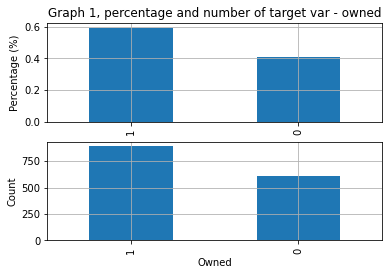

In [11]:
display(df.owned.value_counts())
fig, ax =plt.subplots(2,1)
df.owned.value_counts(normalize=True).plot(kind='bar', ylabel='Percentage (%)', grid=True, ax=ax[0])
df.owned.value_counts().plot(kind='bar', ylabel='Count', xlabel='Owned', grid=True, ax=ax[1])
ax[0].set_title('Graph 1, percentage and number of target var - owned')


[Text(0.5, 1.0, 'Graph 2, distribution of rating')]

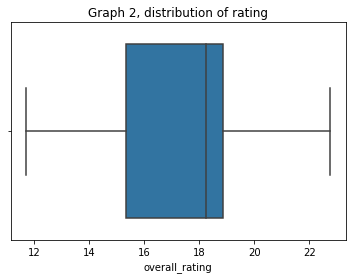

In [12]:
sns.boxplot(x=df['overall_rating']).set(title='Graph 2, distribution of rating')

## Inspecting the distribution overall rating across the values

[Text(0.5, 1.0, 'Graph 3, overall rating vs owned')]

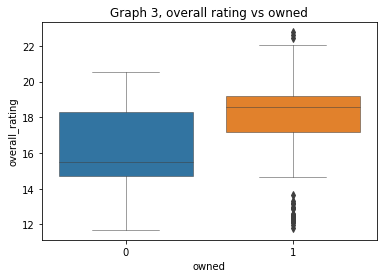

In [13]:
(
sns.boxplot(x='owned', y='overall_rating', data=df, linewidth=0.5)
.set(title='Graph 3, overall rating vs owned')
)

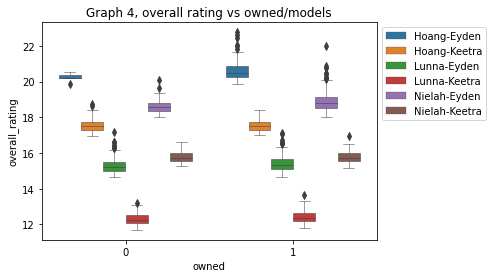

In [14]:
(sns.boxplot(x='owned', y='overall_rating', hue='make_model', data=df, linewidth=0.5)
.set(title='Graph 4, overall rating vs owned/models'))
plt.legend(loc=2, bbox_to_anchor = (1,1))

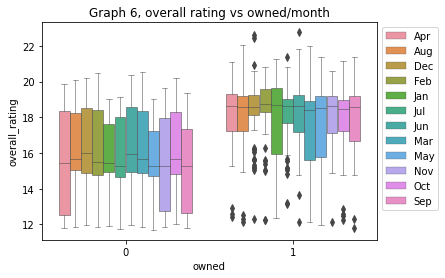

In [15]:
(sns.boxplot(x='owned', y='overall_rating', hue='review_month', data=df, linewidth=0.5)
.set(title='Graph 6, overall rating vs owned/month'))
plt.legend(loc=2, bbox_to_anchor = (1,1))

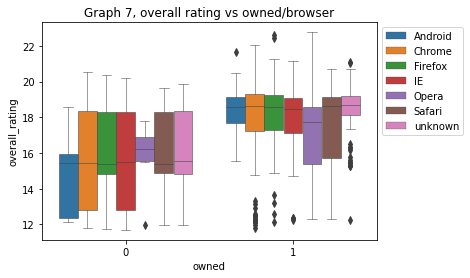

In [16]:
(sns.boxplot(x='owned', y='overall_rating', hue='web_browser', data=df, linewidth=0.5)
.set(title='Graph 7, overall rating vs owned/browser'))
plt.legend(loc=2, bbox_to_anchor = (1,1))

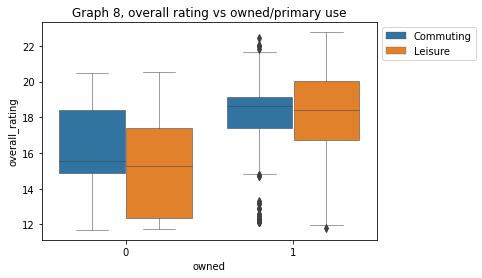

In [17]:
(sns.boxplot(x='owned', y='overall_rating', hue='primary_use', data=df, linewidth=0.5)
.set(title='Graph 8, overall rating vs owned/primary use'))
plt.legend(loc=2, bbox_to_anchor = (1,1))

## Make changes to enable modeling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df.drop('make_model', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['review_month', 'web_browser', 'primary_use', 'value_for_money'], 
               drop_first=True, 
               prefix_sep='_')

In [20]:
scaler = StandardScaler()
scaler.fit(df[['overall_rating', 'reviewer_age']])
df[['overall_rating', 'reviewer_age']] = scaler.transform(df[['overall_rating', 'reviewer_age']])
df.head()

,owned,reviewer_age,overall_rating,review_month_Aug,review_month_Dec,review_month_Feb,review_month_Jan,review_month_Jul,review_month_Jun,review_month_Mar,...,primary_use_Leisure,value_for_money_2,value_for_money_3,value_for_money_4,value_for_money_5,value_for_money_6,value_for_money_7,value_for_money_8,value_for_money_9,value_for_money_10
0,1,-0.967846,0.605826,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,-0.866564,-0.649926,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,-0.461438,-1.791146,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.855221,-0.028186,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0.044969,-1.983395,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# Model Fitting
Predicting whether the recall comes from the owner or not is a binary classification problem. The first model I choose is the decision tree, the model for comparison I take a random forest.

In [21]:
#import ML models and peformance metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [22]:
# Create features set and target set
features = df.drop('owned', axis=1)
target = df['owned']

In [23]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=123)

## Model 1: Decision Tree

In [24]:
# fit Decision Tree model and make prediction
DTC = DecisionTreeClassifier(random_state=123)
DTC.fit(X_train, y_train)
pred_DTC = DTC.predict(X_test)

## Model 2: Random Forest

In [25]:
# fit Random Forest model and make prediction
RFC = RandomForestClassifier(random_state=123)
RFC.fit(X_train, y_train)
pred_RFC = RFC.predict(X_test)

## Model Evaluation
I am choosing accuracy to evaluate the model because they are easy to interpret. Accuracy focuses on correct predictions of all predictions.

The accuracy of the Decision Tree and Random Forest model is 0.66 and 0.73, meaning the Random Forest model predicts more correctly whether a review came from an owner or not.

From this metric, we can conclude that the Random Forest model has a higher chance of that prediction being correct.

## Evaluating Decision Tree Model

In [26]:
print(classification_report(y_test, pred_DTC))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       179
           1       0.74      0.66      0.70       271

    accuracy                           0.66       450
   macro avg       0.65      0.66      0.65       450
weighted avg       0.67      0.66      0.66       450



## Evaluating Random Forest Model

In [27]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       179
           1       0.77      0.79      0.78       271

    accuracy                           0.73       450
   macro avg       0.72      0.71      0.71       450
weighted avg       0.73      0.73      0.73       450

